
CSV - Better Life Index <br>
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata <br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

# Carregameneto do Arquivo e Exploração Inicial

In [ ]:
df_BLI = pd.read_csv('tmdb_5000_movies.csv', sep = ",")
df_BLI

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
df_BLI.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df_BLI.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
df_BLI.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df_BLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
for col in ['budget','revenue','popularity','vote_average','vote_count','runtime']:
    df_BLI[col] = pd.to_numeric(df_BLI[col], errors='coerce')

In [ ]:
df_BLI.dropna()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,ROI
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,10.763566
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2.203333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2.594590
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,3.339756
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,0.092843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,31192,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://downterrace.blogspot.com/,42151,"[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,[],...,2009-09-01,10000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You're only as good as the people you know.,Down Terrace,6.3,26,-0.679405
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,115.708519
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],...,2013-02-14,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,-1.000000
4791,13,"[{""id"": 27, ""name"": ""Horror""

# Estatísticas e Gráficos

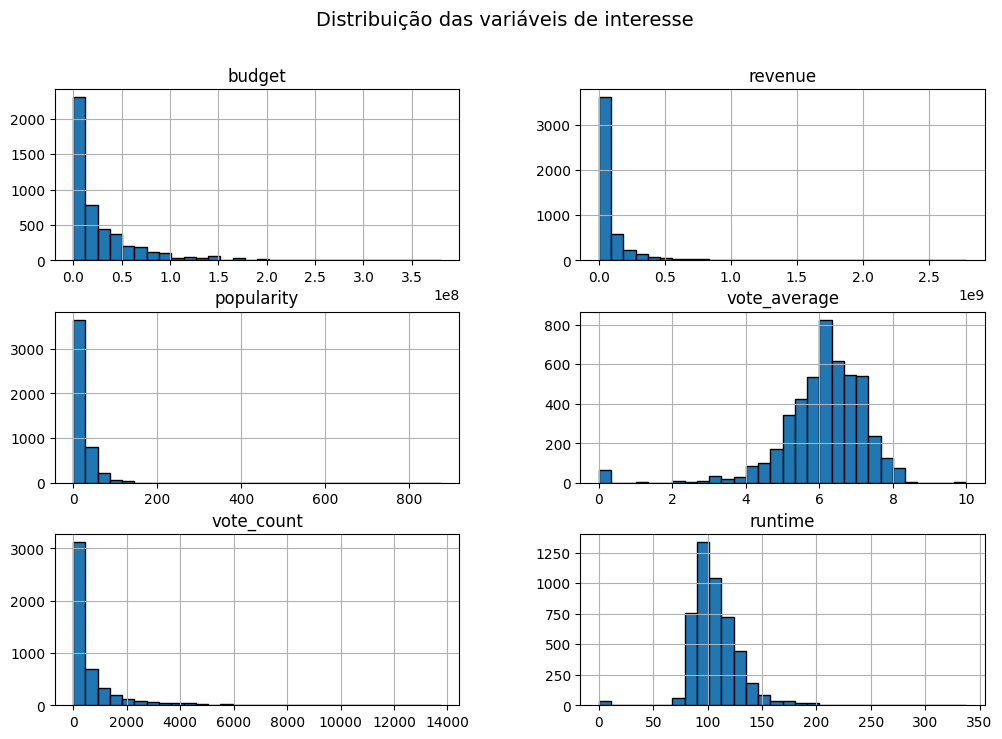

In [ ]:
df_BLI.hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle("Distribuição das variáveis de interesse", fontsize=14)
plt.show()

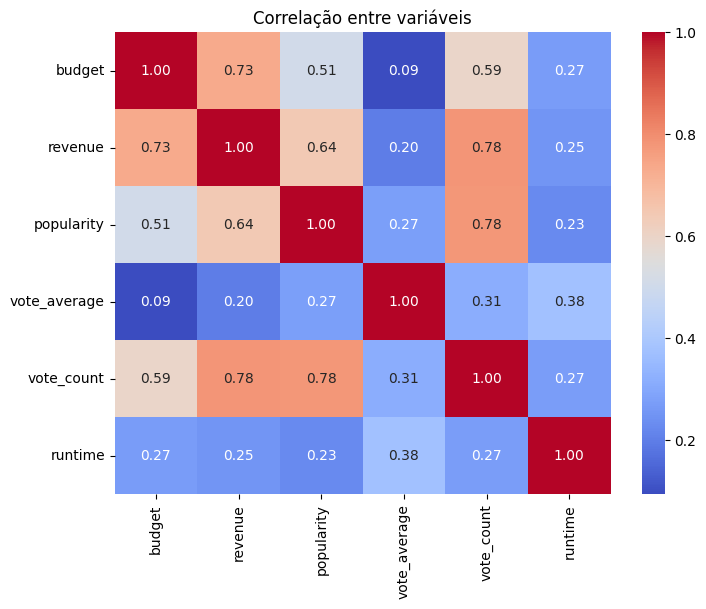

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_BLI.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

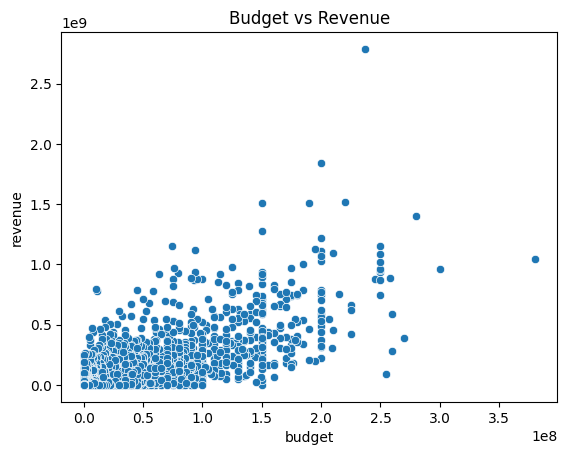

In [ ]:
sns.scatterplot(x='budget', y='revenue', data=df_BLI)
plt.title("Budget vs Revenue")
plt.show()

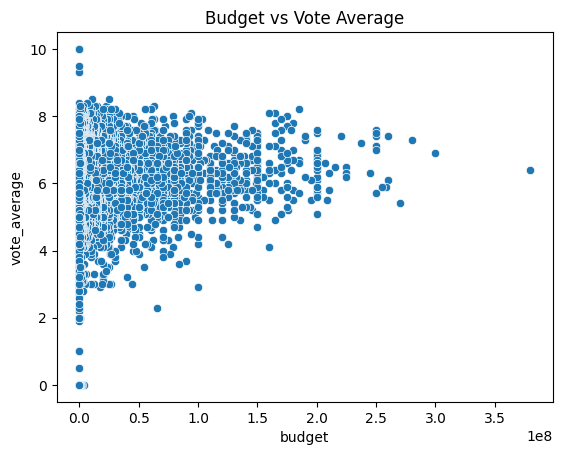

In [ ]:
sns.scatterplot(x='budget', y='vote_average', data=df_BLI)
plt.title("Budget vs Vote Average")
plt.show()

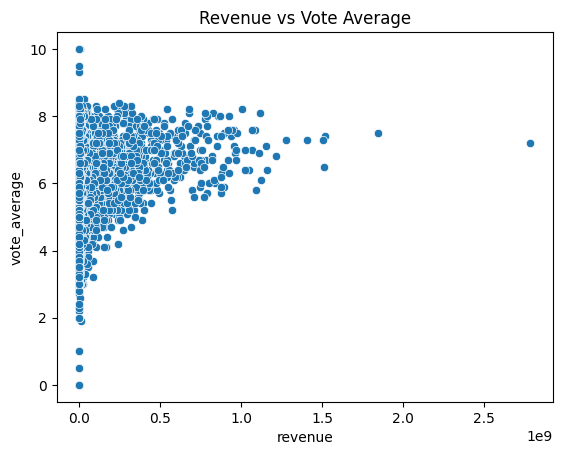

In [ ]:
sns.scatterplot(x='revenue', y='vote_average', data=df_BLI)
plt.title("Revenue vs Vote Average")
plt.show()

# Cálculo do ROI

In [ ]:
df_BLI['ROI'] = np.where(df_BLI['budget'] > 0,
                     (df_BLI['revenue'] - df_BLI['budget']) / df_BLI['budget'],
                     np.nan)

print(df_BLI[['title','budget','revenue','ROI']].head(10))

                                      title     budget     revenue        ROI
0                                    Avatar  237000000  2787965087  10.763566
1  Pirates of the Caribbean: At World's End  300000000   961000000   2.203333
2                                   Spectre  245000000   880674609   2.594590
3                     The Dark Knight Rises  250000000  1084939099   3.339756
4                               John Carter  260000000   284139100   0.092843
5                              Spider-Man 3  258000000   890871626   2.452991
6                                   Tangled  260000000   591794936   1.276134
7                   Avengers: Age of Ultron  280000000  1405403694   4.019299
8    Harry Potter and the Half-Blood Prince  250000000   933959197   2.735837
9        Batman v Superman: Dawn of Justice  250000000   873260194   2.493041


# Seleção das Colunas

In [ ]:
df_work = df_BLI[['title', 'budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'ROI']]
df_work.head()

,title,budget,revenue,vote_average,vote_count,popularity,ROI
0,Avatar,237000000,2787965087,7.2,11800,150.437577,10.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,6.9,4500,139.082615,2.203333
2,Spectre,245000000,880674609,6.3,4466,107.376788,2.594590
3,The Dark Knight Rises,250000000,1084939099,7.6,9106,112.312950,3.339756
4,John Carter,260000000,284139100,6.1,2124,43.926995,0.092843


In [ ]:
df_work['budget'] = pd.to_numeric(df_work['budget'], errors='coerce')
df_work['revenue'] = pd.to_numeric(df_work['revenue'], errors='coerce')
df_work['vote_average'] = pd.to_numeric(df_work['vote_average'], errors='coerce')
df_work['ROI'] = pd.to_numeric(df_work['ROI'], errors='coerce')

/tmp/ipython-input-3354128787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['budget'] = pd.to_numeric(df_work['budget'], errors='coerce')
/tmp/ipython-input-3354128787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['revenue'] = pd.to_numeric(df_work['revenue'], errors='coerce')
/tmp/ipython-input-3354128787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_corr = df_work[['budget','revenue','vote_average','ROI']].replace([np.inf,-np.inf], np.nan).dropna()

# Verificações Matemáticas e Gráficos(Questão 6)

In [ ]:
pairs = [
    ('budget','revenue'),
    ('budget','vote_average'),
    ('revenue','vote_average'),
    ('ROI','vote_average')
]

In [ ]:
for x, y in pairs:
    r, p = pearsonr(df_corr[x], df_corr[y])
    print(f"{x} vs {y}: r = {r:.4f}, p = {p:.4e}")

budget vs revenue: r = 0.7099, p = 0.0000e+00
budget vs vote_average: r = 0.0195, p = 2.3178e-01
revenue vs vote_average: r = 0.2030, p = 2.6230e-36
ROI vs vote_average: r = 0.0288, p = 7.7255e-02


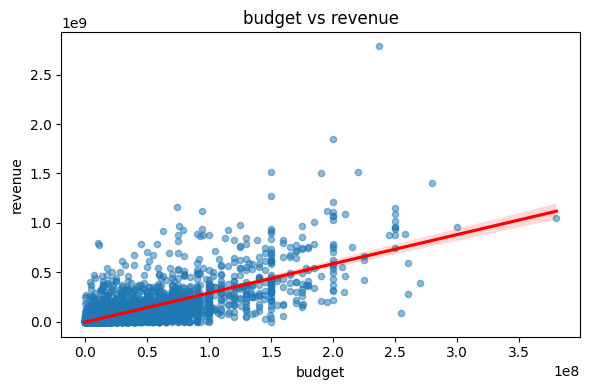

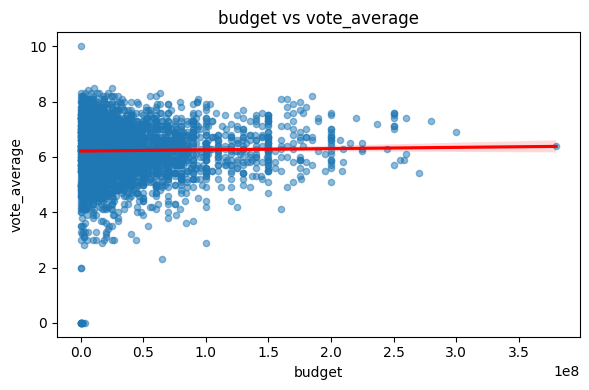

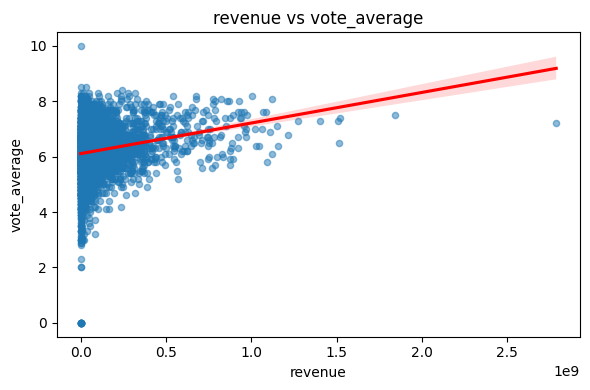

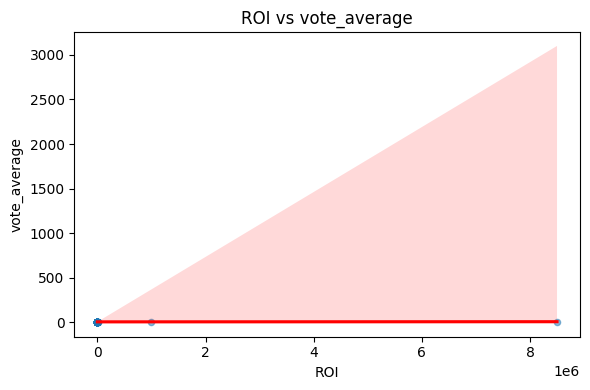

In [ ]:
for x, y in pairs:
    plt.figure(figsize=(6,4))
    sns.regplot(x=x, y=y, data=df_corr, scatter_kws={'s':20, 'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

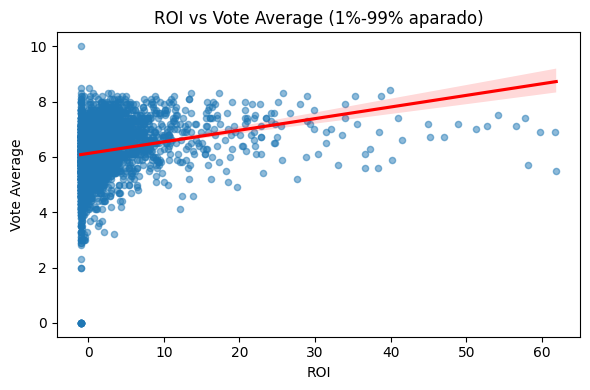

In [ ]:

low, high = df_corr['ROI'].quantile([0.01, 0.99])
df_roi_plot = df_corr[(df_corr['ROI'] >= low) & (df_corr['ROI'] <= high)]

plt.figure(figsize=(6,4))
sns.regplot(x='ROI', y='vote_average', data=df_roi_plot, scatter_kws={'s':20,'alpha':0.5}, line_kws={'color':'red'})
plt.title("ROI vs Vote Average (1%-99% aparado)")
plt.xlabel("ROI")
plt.ylabel("Vote Average")
plt.tight_layout()
plt.show()


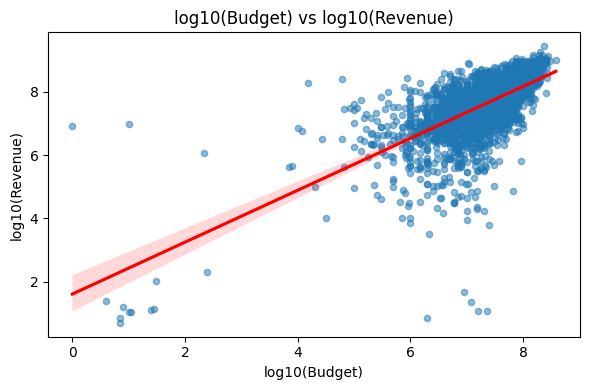

In [ ]:
df_log = df_corr[(df_corr['budget']>0) & (df_corr['revenue']>0)].copy()
df_log['log_budget'] = np.log10(df_log['budget'])
df_log['log_revenue'] = np.log10(df_log['revenue'])

plt.figure(figsize=(6,4))
sns.regplot(x='log_budget', y='log_revenue', data=df_log, scatter_kws={'s':20,'alpha':0.5}, line_kws={'color':'red'})
plt.title("log10(Budget) vs log10(Revenue)")
plt.xlabel("log10(Budget)")
plt.ylabel("log10(Revenue)")
plt.tight_layout()
plt.show()